In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [62]:
df = pd.read_csv('./resources/heart_2022_no_nans.csv')


In [63]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [65]:
df.describe()


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [66]:
print(df.columns)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


<Axes: xlabel='HadHeartAttack', ylabel='count'>

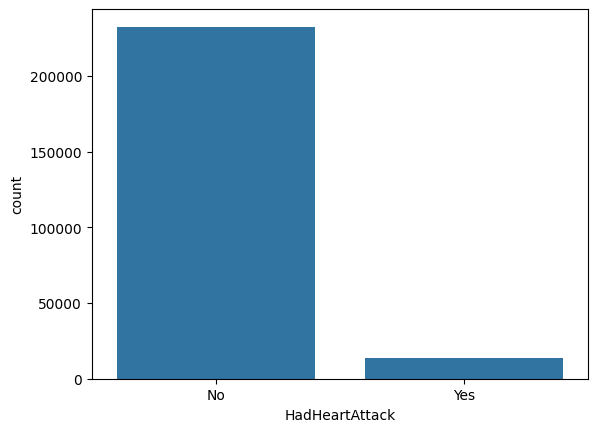

In [67]:
sns.countplot(df, x='HadHeartAttack')

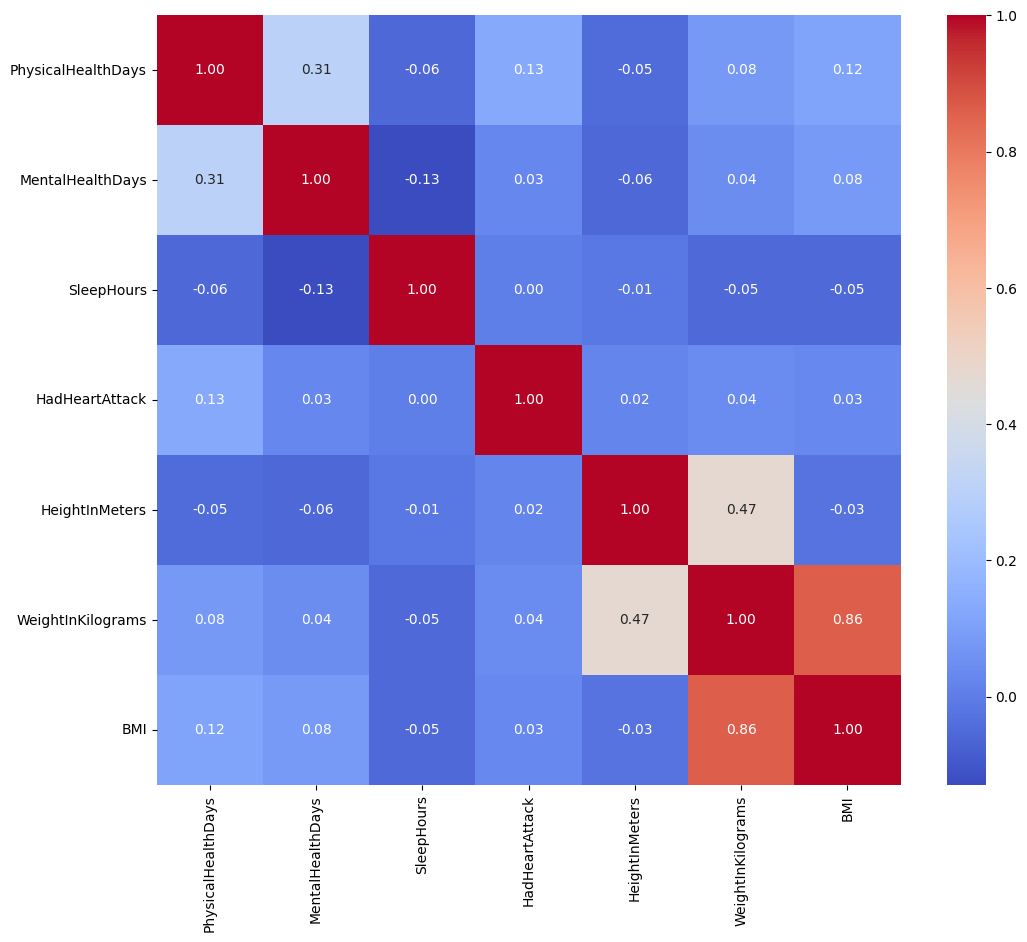

In [68]:
# Convert 'HadHeartAttack' to numerical for correlation analysis
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# Get the numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Print corelation matrix
corr = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Proportion of Records by State')

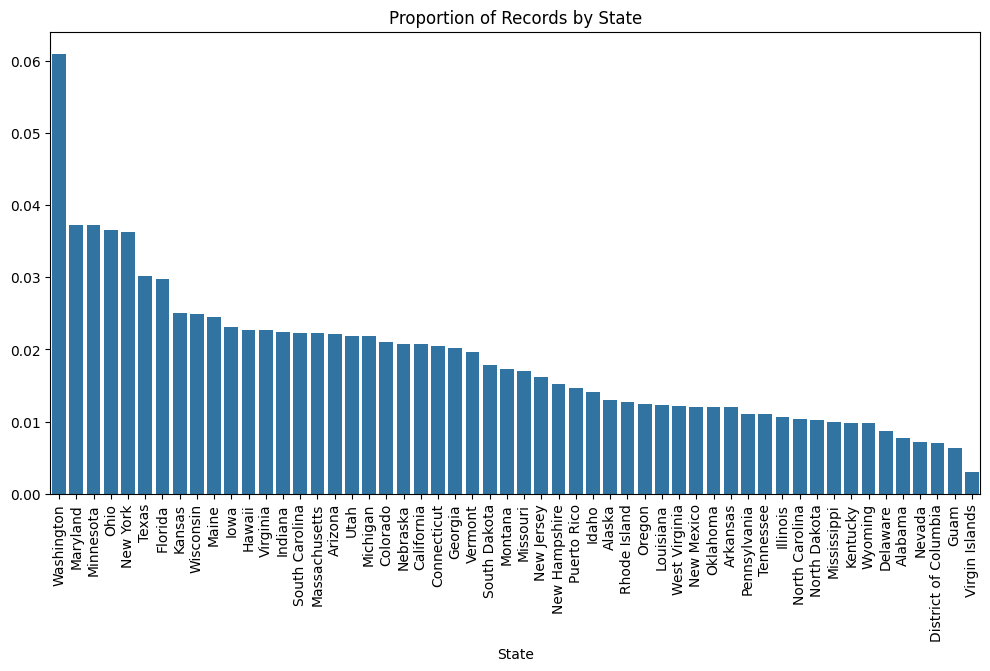

In [69]:
# Plot the ratio of targets for each state
state_counts = df['State'].value_counts(normalize=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xticks(rotation=90)
plt.title('Proportion of Records by State')


Text(0.5, 1.0, 'Proportion of Heart Attacks by State')

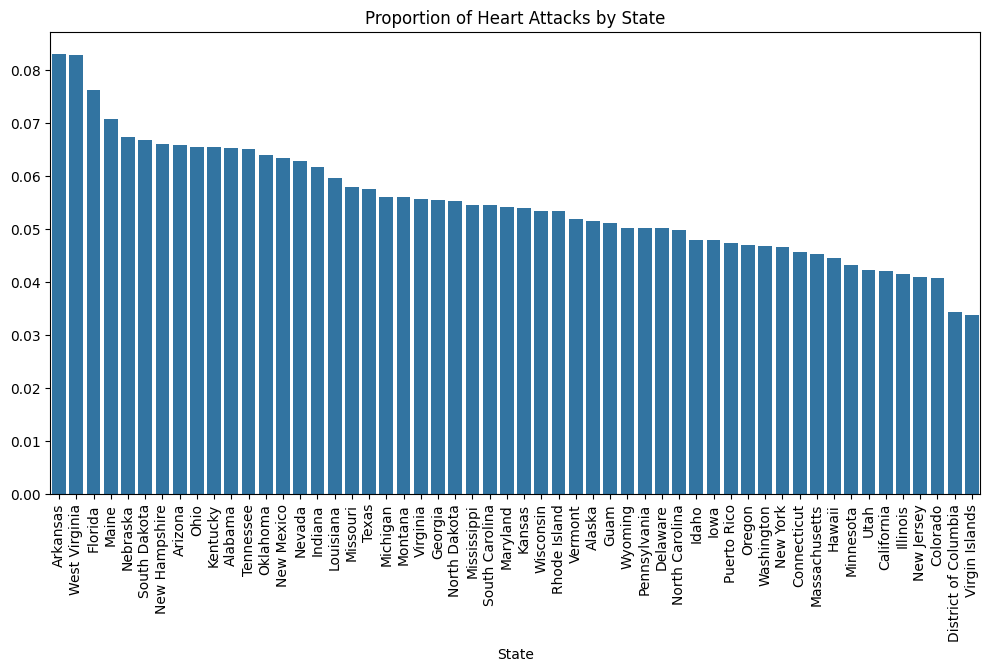

In [70]:
# Now plot the HadHeartAttack ratio for each state
state_heart_attack = df.groupby('State')['HadHeartAttack'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_heart_attack.index, y=state_heart_attack.values)
plt.xticks(rotation=90)
plt.title('Proportion of Heart Attacks by State')


Text(0.5, 1.0, 'Proportion of Heart Attacks by Age Category')

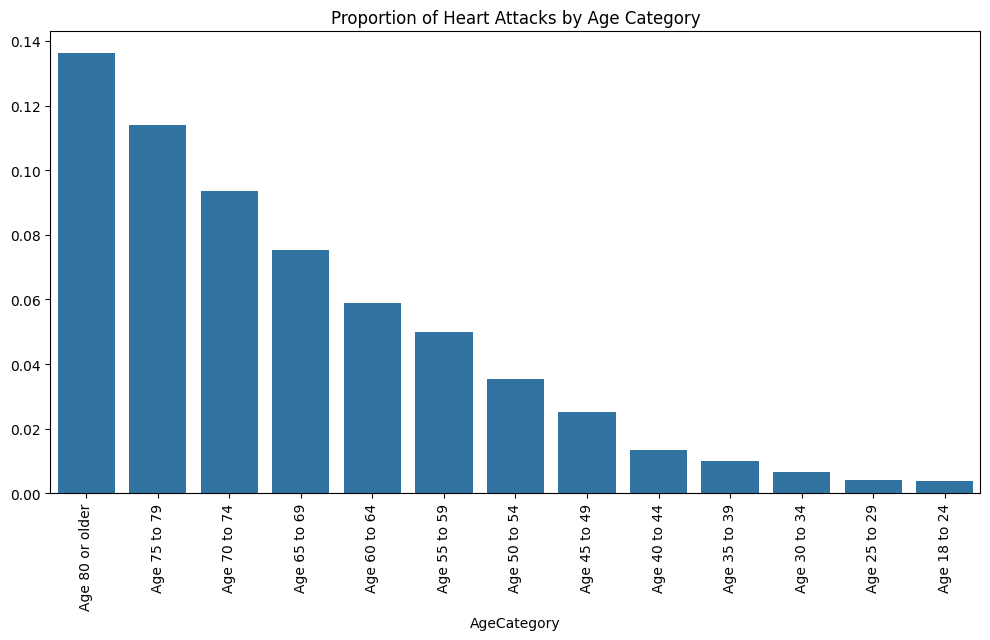

In [71]:
# Plot the heart attack rate based on the age category
age_heart_attack = df.groupby('AgeCategory')['HadHeartAttack'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=age_heart_attack.index, y=age_heart_attack.values)
plt.xticks(rotation=90)
plt.title('Proportion of Heart Attacks by Age Category')

/var/folders/_l/h44zx0_s3pd47gnlplq87_1h0000gn/T/ipykernel_32810/2810666894.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_heart_attack = df.groupby('BMICategory')['HadHeartAttack'].mean().sort_index()


Text(0.5, 1.0, 'Proportion of Heart Attacks by BMI Category')

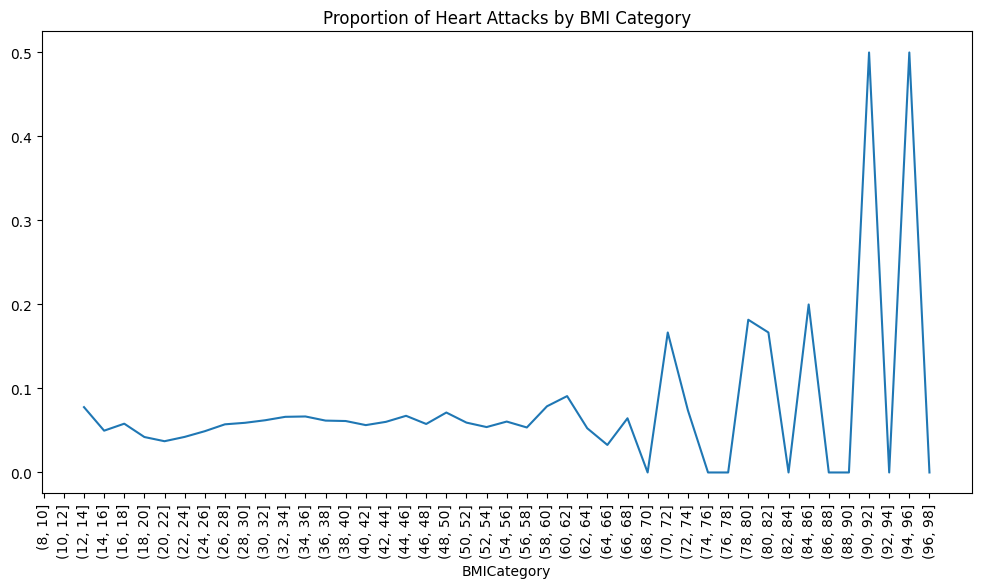

In [72]:
# Plot the heart attack rate based on the BMI, treat each 0.05 increment as a category
df['BMICategory'] = pd.cut(df['BMI'], bins=np.arange(0, 100, 2))
# Sort for ascending BMI
bmi_heart_attack = df.groupby('BMICategory')['HadHeartAttack'].mean().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=bmi_heart_attack.index.astype(str), y=bmi_heart_attack.values)
plt.xticks(rotation=90)
plt.title('Proportion of Heart Attacks by BMI Category')


Text(0.5, 1.0, 'BMI Distribution')

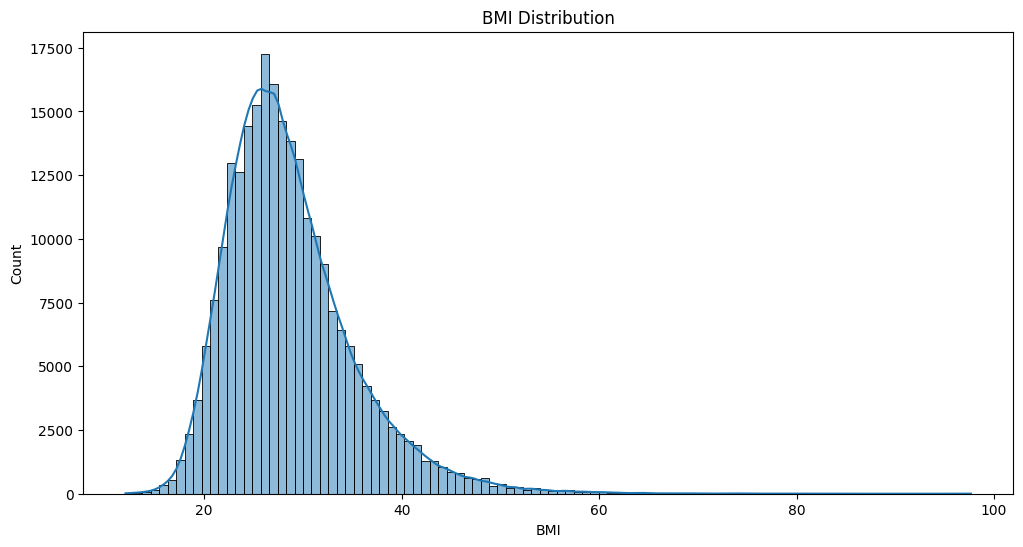

In [73]:
# Plot the BMI distribution with binsize of 1
plt.figure(figsize=(12, 6))
sns.histplot(df['BMI'], bins=100, kde=True)
plt.title('BMI Distribution')


<Axes: xlabel='Sex'>

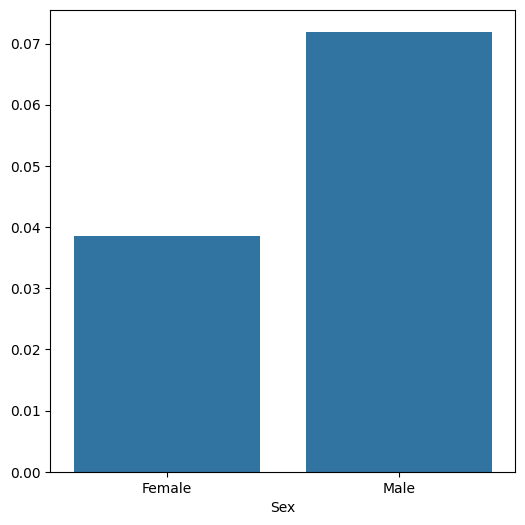

In [74]:
# Plot heart attack rate based on gender
gender_heart_attack = df.groupby('Sex')['HadHeartAttack'].mean()
plt.figure(figsize=(6, 6))
sns.barplot(x=gender_heart_attack.index, y=gender_heart_attack.values)

Text(0.5, 1.0, 'Proportion of Heart Attacks by Sleep Time')

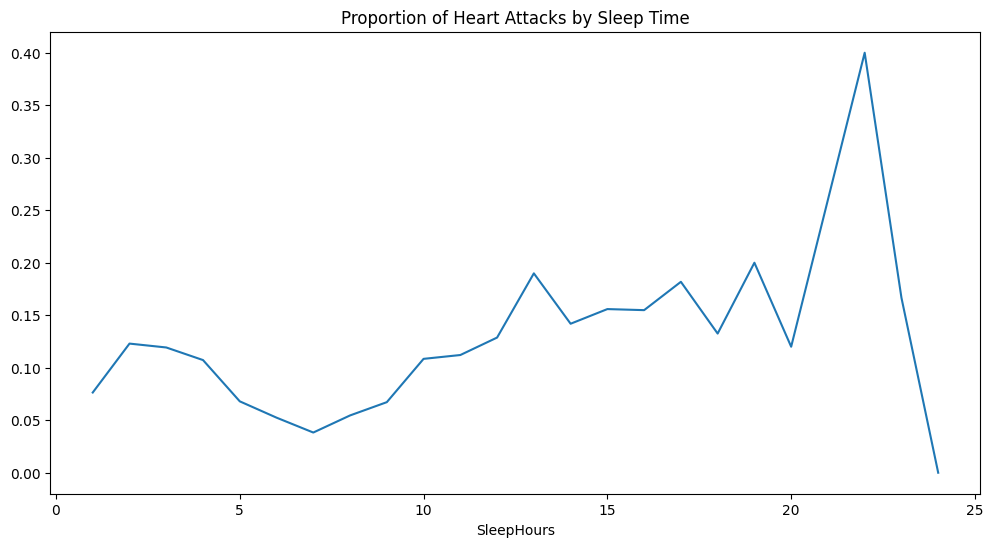

In [75]:
# Plot heart attack rate based on sleeping hours
sleep_heart_attack = df.groupby('SleepHours')['HadHeartAttack'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sleep_heart_attack.index, y=sleep_heart_attack.values)
plt.title('Proportion of Heart Attacks by Sleep Time')


Text(0.5, 1.0, 'Sleep Hours Distribution')

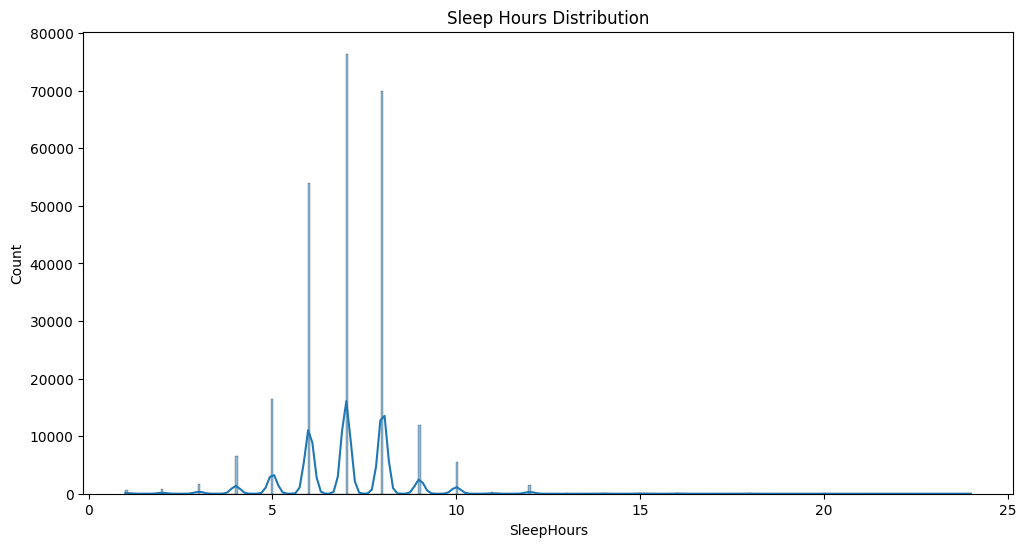

In [76]:
# Plot the sleep hours distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['SleepHours'], kde=True)
plt.title('Sleep Hours Distribution')


Text(0.5, 1.0, 'Proportion of Heart Attacks by Number of Removed Teeth')

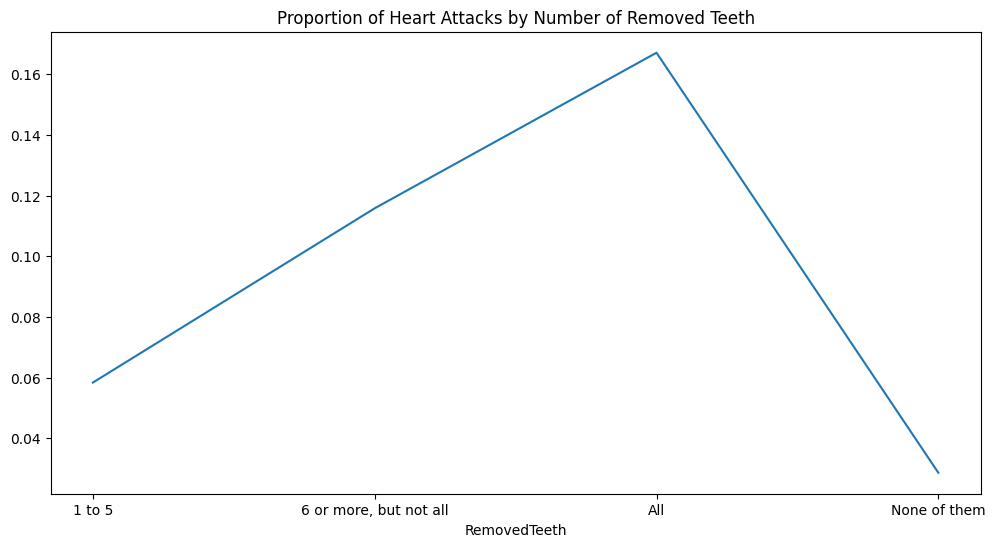

In [77]:
# Plot heart attack rate against RemovedTeeth
teeth_heart_attack = df.groupby('RemovedTeeth')['HadHeartAttack'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=teeth_heart_attack.index, y=teeth_heart_attack.values)
plt.title('Proportion of Heart Attacks by Number of Removed Teeth')


Text(0.5, 1.0, 'Removed Teeth Distribution')

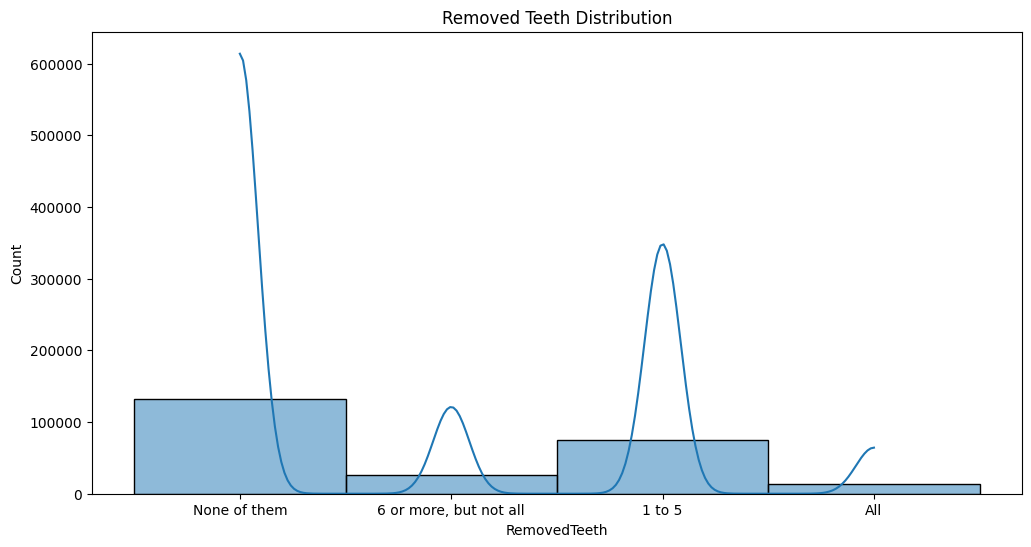

In [78]:
# Plot the RemovedTeeth distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['RemovedTeeth'], bins=30, kde=True)
plt.title('Removed Teeth Distribution')


In [79]:
# Print the number of people who has their teeth removed, 'All'
print(df['RemovedTeeth'].value_counts())

RemovedTeeth
None of them              131592
1 to 5                     74702
6 or more, but not all     25950
All                        13778
Name: count, dtype: int64


Text(0.5, 1.0, 'Proportion of Heart Attacks by Smoker Status')

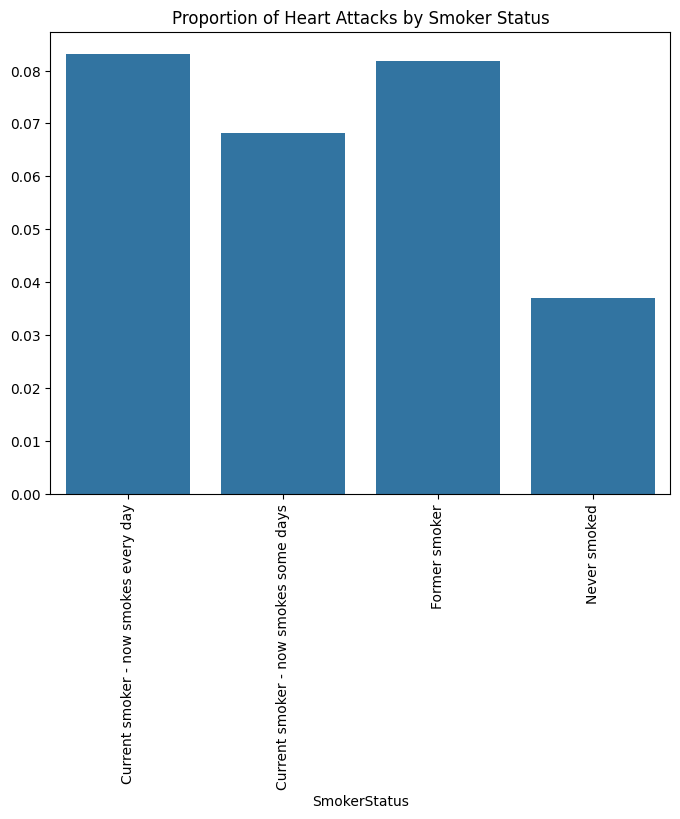

In [80]:
# Print the heart attack rate against SmokerStatus
smoker_heart_attack = df.groupby('SmokerStatus')['HadHeartAttack'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=smoker_heart_attack.index, y=smoker_heart_attack.values)
plt.xticks(rotation=90)
plt.title('Proportion of Heart Attacks by Smoker Status')


([0, 1, 2, 3],
 [Text(0, 0, 'Never used e-cigarettes in my entire life'),
  Text(1, 0, 'Not at all (right now)'),
  Text(2, 0, 'Use them every day'),
  Text(3, 0, 'Use them some days')])

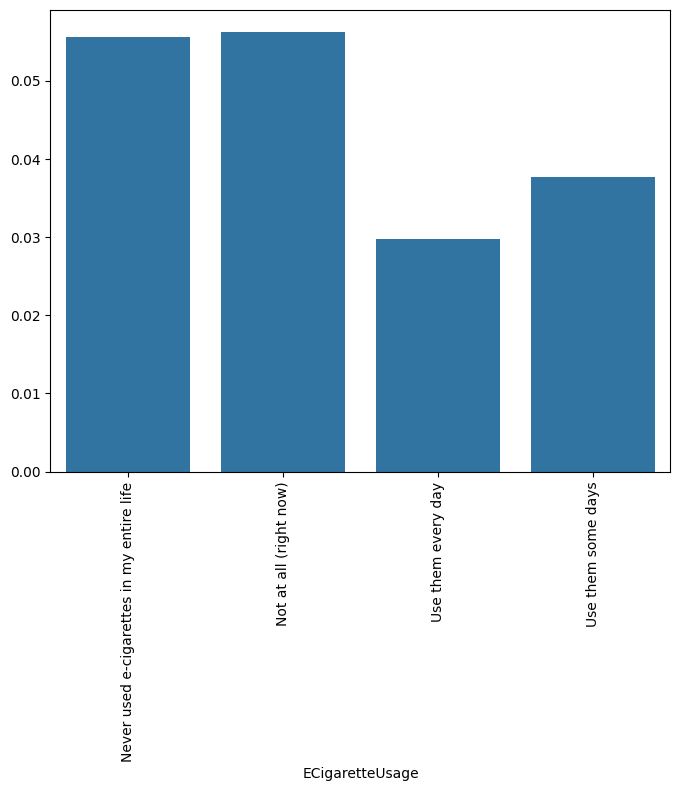

In [81]:
# Plot heart attack rate against ECigaretteUsage
ecig_heart_attack = df.groupby('ECigaretteUsage')['HadHeartAttack'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=ecig_heart_attack.index, y=ecig_heart_attack.values)
plt.xticks(rotation=90)

In [82]:
# Print the joint probability of SmokerStatus and ECigaretteUsage
joint_prob = pd.crosstab(df['SmokerStatus'], df['ECigaretteUsage'], normalize='all')
joint_prob


ECigaretteUsage,Never used e-cigarettes in my entire life,Not at all (right now),Use them every day,Use them some days
SmokerStatus,,,,
Current smoker - now smokes every day,0.043594,0.034968,0.002935,0.006540
Current smoker - now smokes some days,0.016637,0.010393,0.002280,0.003609
Former smoker,0.196930,0.060125,0.013507,0.007979
Never smoked,0.515649,0.070437,0.005483,0.008934


In [83]:
# Print the e cigarette usage counts
print(df['ECigaretteUsage'].value_counts())

ECigaretteUsage
Never used e-cigarettes in my entire life    190128
Not at all (right now)                        43281
Use them some days                             6658
Use them every day                             5955
Name: count, dtype: int64


Text(0.5, 1.0, 'Proportion of Heart Attacks by Race/Ethnicity Category')

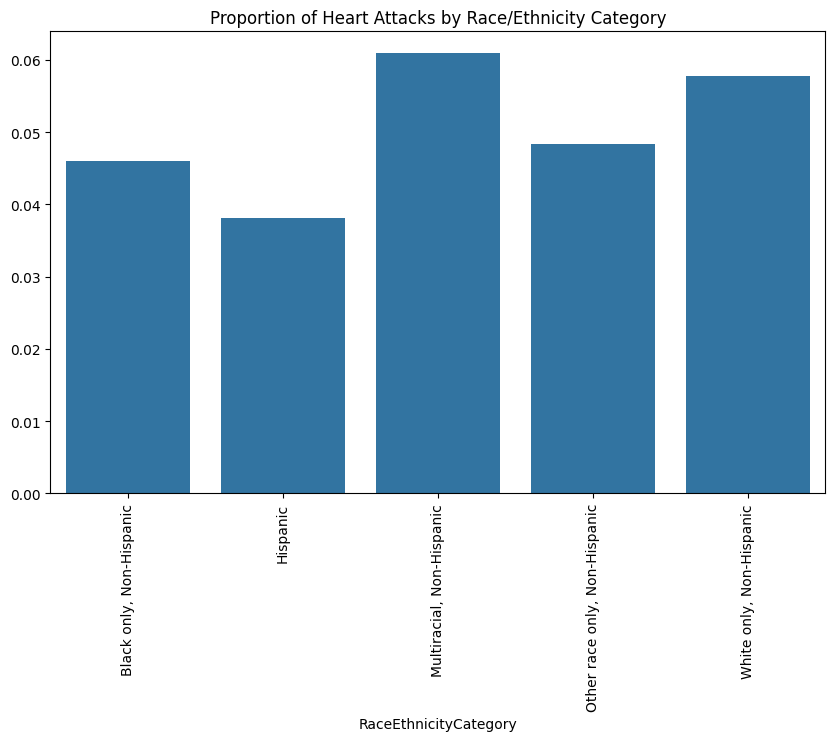

In [84]:
# Print RaceEthnicityCategory heart attack rate
race_heart_attack = df.groupby('RaceEthnicityCategory')['HadHeartAttack'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=race_heart_attack.index, y=race_heart_attack.values)
plt.xticks(rotation=90)
plt.title('Proportion of Heart Attacks by Race/Ethnicity Category')


Text(0.5, 1.0, 'Proportion of Heart Attacks by Alcohol Drinking Status')

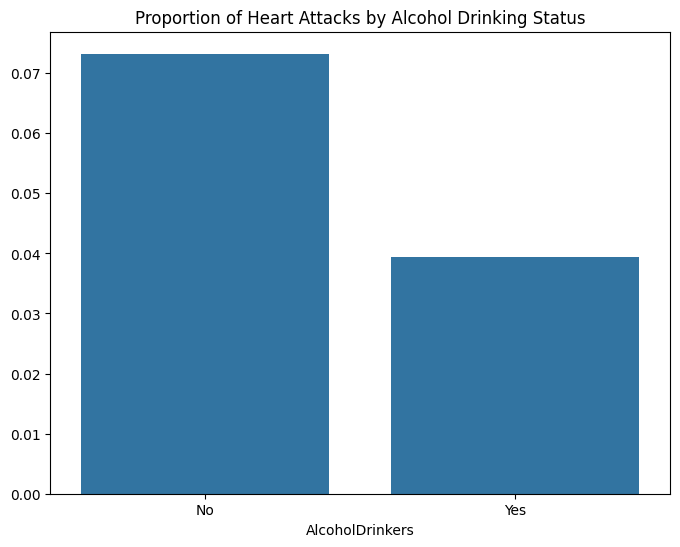

In [85]:
# Plot the heart attack rate AlcoholDrinkers
alcohol_heart_attack = df.groupby('AlcoholDrinkers')['HadHeartAttack'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=alcohol_heart_attack.index, y=alcohol_heart_attack.values)
plt.title('Proportion of Heart Attacks by Alcohol Drinking Status')


In [86]:
# Plot the alcohol drinkers counts
print(df['AlcoholDrinkers'].value_counts())

AlcoholDrinkers
Yes    135307
No     110715
Name: count, dtype: int64


Text(0.5, 1.0, 'Proportion of Heart Attacks by General Health Status')

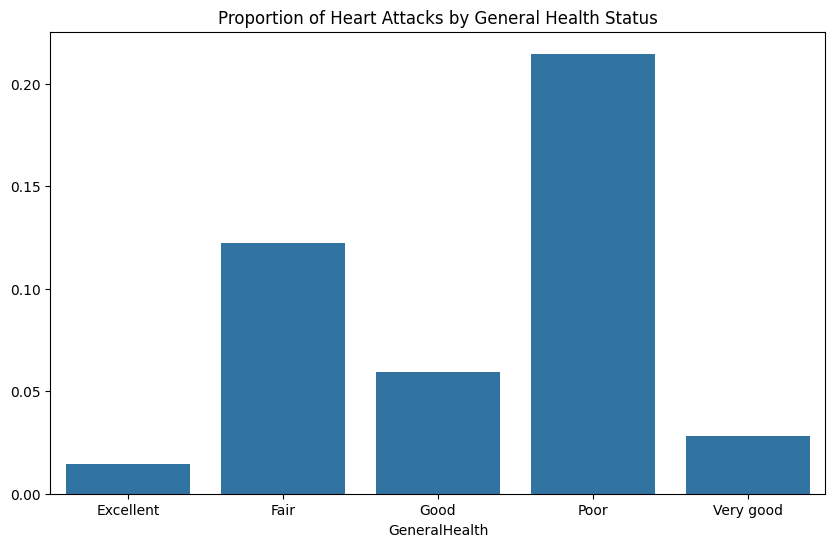

In [87]:
# Plot heart attack rate against GeneralHealth
health_heart_attack = df.groupby('GeneralHealth')['HadHeartAttack'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=health_heart_attack.index, y=health_heart_attack.values)
plt.title('Proportion of Heart Attacks by General Health Status')


([0, 1, 2, 3],
 [Text(0, 0, '5 or more years ago'),
  Text(1, 0, 'Within past 2 years (1 year but less than 2 years ago)'),
  Text(2, 0, 'Within past 5 years (2 years but less than 5 years ago)'),
  Text(3, 0, 'Within past year (anytime less than 12 months ago)')])

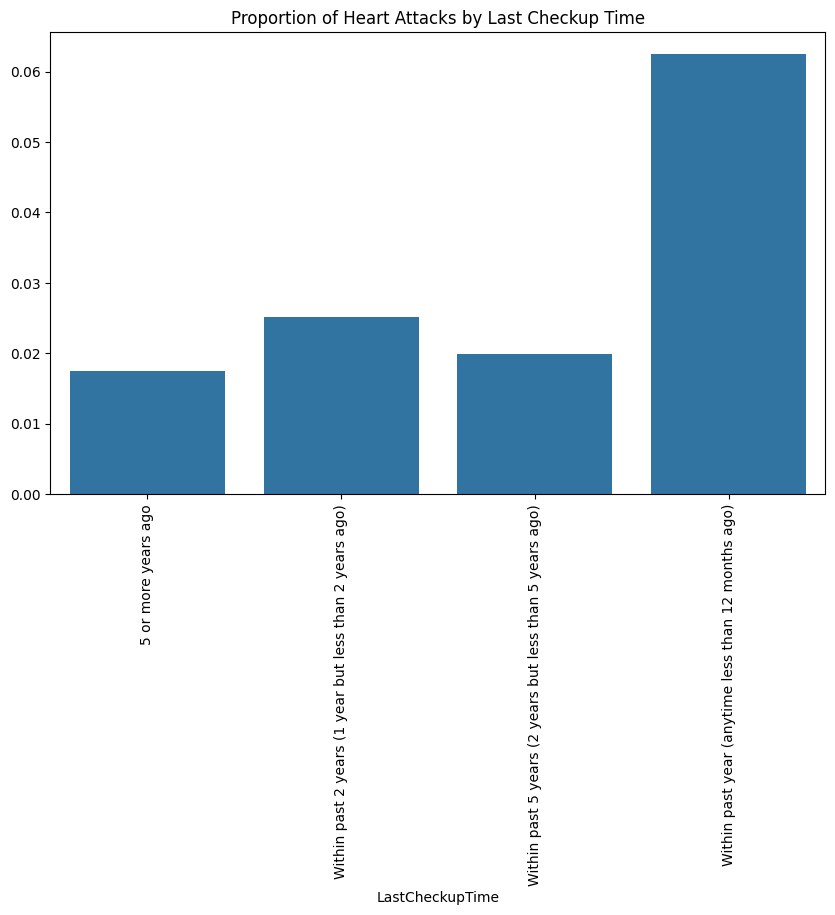

In [88]:
# Plot heart attack rate against LastCheckupTime
checkup_heart_attack = df.groupby('LastCheckupTime')['HadHeartAttack'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=checkup_heart_attack.index, y=checkup_heart_attack.values)
plt.title('Proportion of Heart Attacks by Last Checkup Time')
# rotate x labels
plt.xticks(rotation=90)



In [89]:
# numbers of LastCheckupTime
print(df['LastCheckupTime'].value_counts())

LastCheckupTime
Within past year (anytime less than 12 months ago)         198153
Within past 2 years (1 year but less than 2 years ago)      23227
Within past 5 years (2 years but less than 5 years ago)     13744
5 or more years ago                                         10898
Name: count, dtype: int64


([0, 1, 2],
 [Text(0, 0, 'No'),
  Text(1, 0, 'Tested positive using home test without a health professional'),
  Text(2, 0, 'Yes')])

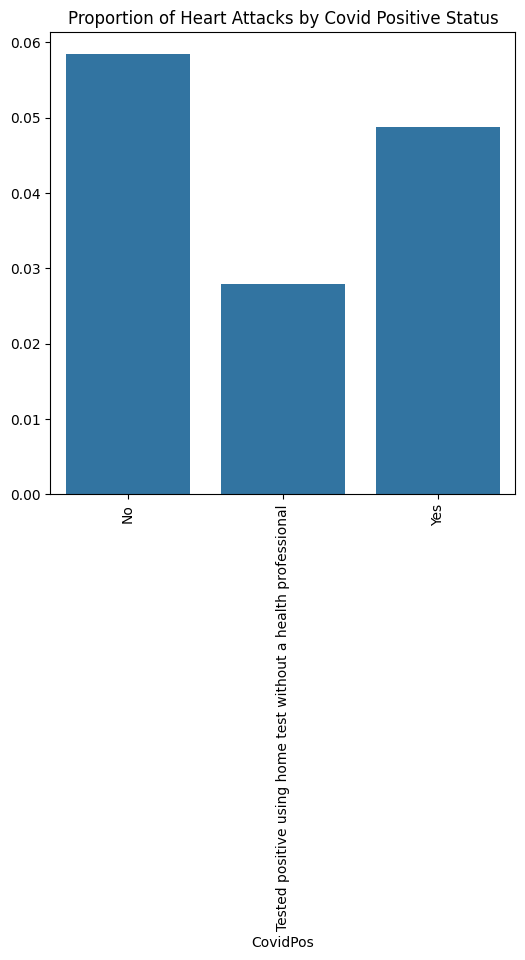

In [90]:
# Plot heart attack rate against CovidPos
covid_heart_attack = df.groupby('CovidPos')['HadHeartAttack'].mean()
plt.figure(figsize=(6, 6))
sns.barplot(x=covid_heart_attack.index, y=covid_heart_attack.values)
plt.title('Proportion of Heart Attacks by Covid Positive Status')
# rotate x labels
plt.xticks(rotation=90)



In [91]:
# numbers of CovidPos
print(df['CovidPos'].value_counts())


CovidPos
No                                                               167306
Yes                                                               70324
Tested positive using home test without a health professional      8392
Name: count, dtype: int64


Text(0.5, 1.0, 'Proportion of Heart Attacks by Stroke History')

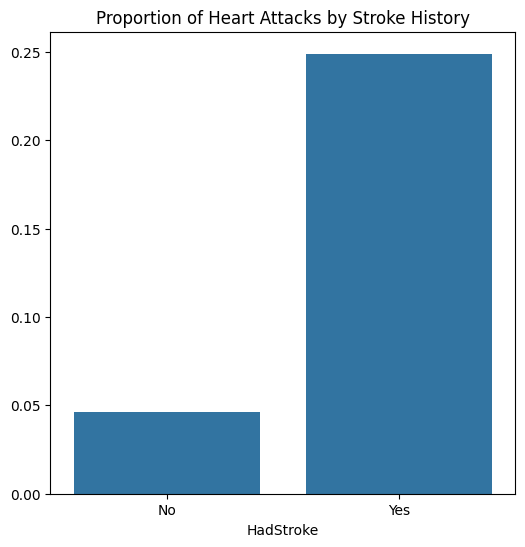

In [92]:
# Plot heart attack rate against HadStroke
stroke_heart_attack = df.groupby('HadStroke')['HadHeartAttack'].mean()
plt.figure(figsize=(6, 6))
sns.barplot(x=stroke_heart_attack.index, y=stroke_heart_attack.values)
plt.title('Proportion of Heart Attacks by Stroke History')


Text(0.5, 1.0, 'Proportion of Heart Attacks by Depressive Disorder History')

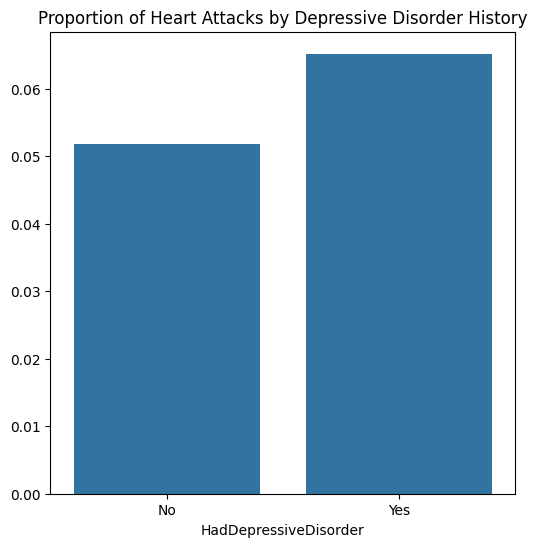

In [93]:
# plot the heart attack rate against HadDepressiveDisorder
depression_heart_attack = df.groupby('HadDepressiveDisorder')['HadHeartAttack'].mean()
plt.figure(figsize=(6, 6))
sns.barplot(x=depression_heart_attack.index, y=depression_heart_attack.values)
plt.title('Proportion of Heart Attacks by Depressive Disorder History')


In [94]:
# Replace the state column with the heart attack ratio
df['State_HeartAttack_Ratio'] = df['State'].map(state_heart_attack)

In [95]:
# Scale the 'State_HeartAttack_Ratio' column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['State_HeartAttack_Ratio_Scaled'] = scaler.fit_transform(df[['State_HeartAttack_Ratio']])


([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

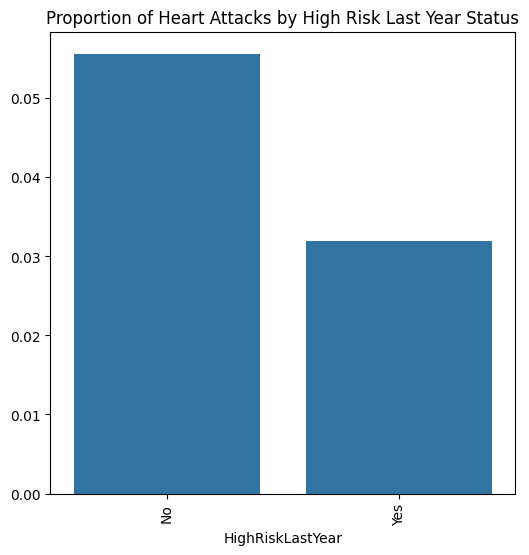

In [96]:
#PLot heart attack rate against HighRiskLastYear
highrisk_heart_attack = df.groupby('HighRiskLastYear')['HadHeartAttack'].mean()
plt.figure(figsize=(6, 6))
sns.barplot(x=highrisk_heart_attack.index, y=highrisk_heart_attack.values)
plt.title('Proportion of Heart Attacks by High Risk Last Year Status')
# rotate x labels
plt.xticks(rotation=90)


In [97]:
state_ratio_mapping = {state: ratio for state, ratio in state_heart_attack.items()}
df['State'] = df['State'].map(state_ratio_mapping)

In [98]:
df['State'].head()

0    0.065195
1    0.065195
2    0.065195
3    0.065195
4    0.065195
Name: State, dtype: float64

In [99]:
new_df = pd.read_csv('./resources/heart_2022_no_nans.csv')

In [100]:
print("NaNs:", df["HadHeartAttack"].isna().sum())
print("Infs:", np.isinf(df["HadHeartAttack"]).sum())
print("Unique:", df["HadHeartAttack"].unique()[:20])

NaNs: 0
Infs: 0
Unique: [0 1]
